In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import os
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first few rows
df.head()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
# Step 2: Exploratory Data Analysis (EDA)
# 2.1 Data Quality Check and Handling Missing Values
# Check for missing values
df.isnull().sum()
# Basic statistics of the dataset
df.describe()

# Check the data types of each column
df.dtypes




Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

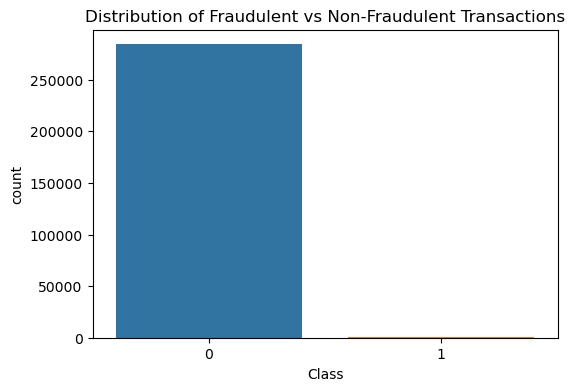

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [30]:
# 2.2 Visualization of Fraudulent and Non-Fraudulent Transactions
# Visualize the distribution of target classes
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Checking the percentage of fraudulent transactions
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)


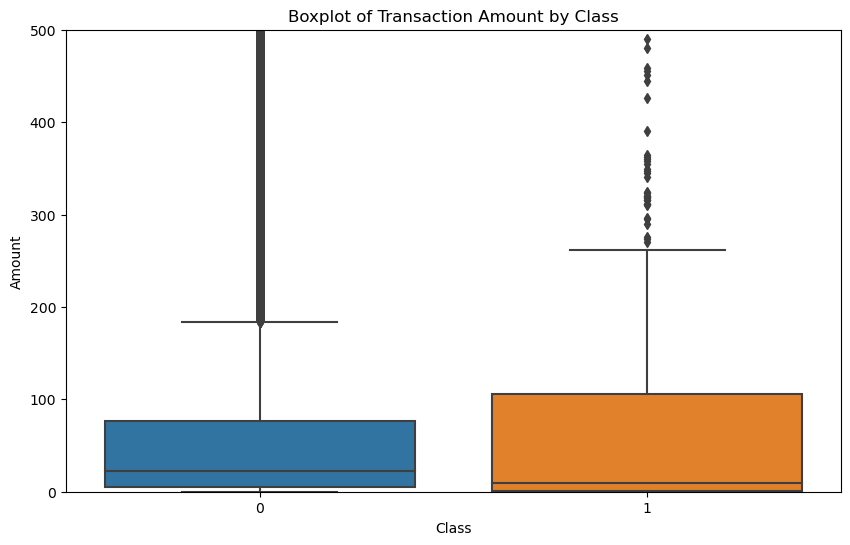

Time      datetime64[ns]
V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
Amount           float64
Class              int64
dtype: object

In [31]:
# 2.3 Check for Outliers and Correct Datatype for Date
# Outliers visualization for amount
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.ylim(0, 500)
plt.title('Boxplot of Transaction Amount by Class')
plt.show()

# Check the datatype for Time column and convert if necessary
df['Time'] = pd.to_datetime(df['Time'], unit='s', origin='unix')
df.dtypes


In [32]:
#  Step 3: Dealing with imbalanced data

# Check data types of the dataframe
print(df.dtypes)


Time      datetime64[ns]
V1               float64
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
V10              float64
V11              float64
V12              float64
V13              float64
V14              float64
V15              float64
V16              float64
V17              float64
V18              float64
V19              float64
V20              float64
V21              float64
V22              float64
V23              float64
V24              float64
V25              float64
V26              float64
V27              float64
V28              float64
Amount           float64
Class              int64
dtype: object


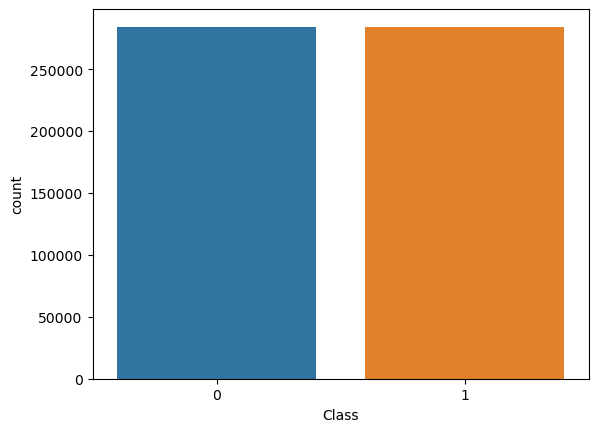

In [33]:
# Convert 'Time' column to numeric features (extracting hour)
df['Hour'] = df['Time'].dt.hour

# Drop the original 'Time' column as it's no longer needed
df.drop(['Time'], axis=1, inplace=True)

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution after SMOTE
sns.countplot(x=y_resampled)
plt.show()


In [34]:
# Step 4 : Feature Engineering

# Initialize the StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numeric_columns = ['Amount', 'Hour']

# Scale numerical columns in the data
X_resampled[numeric_columns] = scaler.fit_transform(X_resampled[numeric_columns])


# Combine the resampled features and target into a single DataFrame
preprocessed_df = X_resampled.copy()
preprocessed_df['Class'] = y_resampled

# Save the preprocessed data to a CSV file
output_folder = "E:\\capstone_upgrad\\project2_finddefault\\data\\processed"
output_filename = 'preprocessed_data.csv'
output_filepath = os.path.join(output_folder, output_filename)


# Ensure the output directory exists
if not os.path.exists(output_folder):
    print(f"Output folder does not exist. Creating folder: {output_folder}")
    os.makedirs(output_folder)

# Try saving the DataFrame to a CSV file
try:
    preprocessed_df.to_csv(output_filepath, index=False)
    print(f"Preprocessed data successfully saved to {output_filepath}")
except Exception as e:
    print(f"An error occurred while saving the CSV file: {e}")
    

# Display first few rows to check the scaling
print(X_resampled.head())


Preprocessed data successfully saved to E:\capstone_upgrad\project2_finddefault\data\processed\preprocessed_data.csv
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074 

In [35]:
# Step 5: Split the Resampled Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [12]:
# Step 6: Train a RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Step 7: Make Predictions on the Test Set

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [14]:
# Step 8: Evaluate the Model

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56740    10]
 [    0 56976]]
ROC AUC Score: 0.9999993311968747


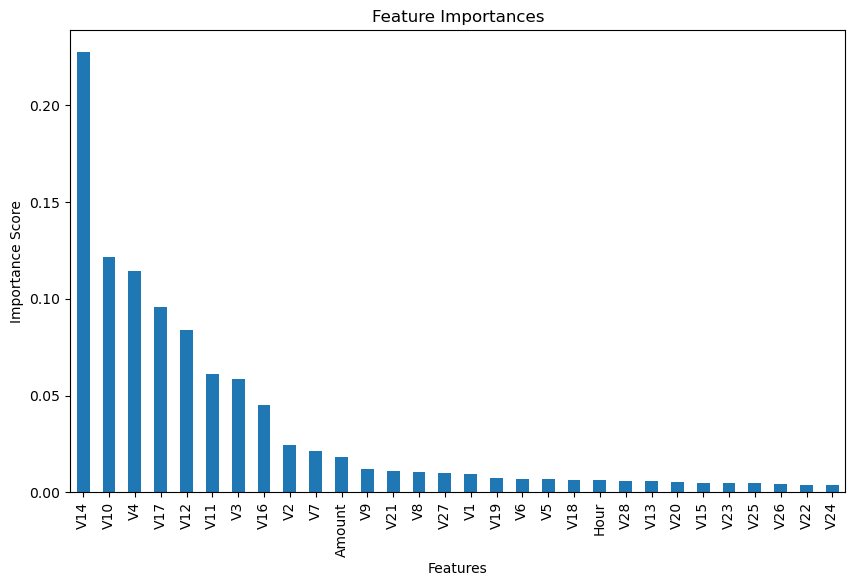

In [15]:
# Step 9: Plot Feature Importances

import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a pandas Series for plotting
import pandas as pd

features = X.columns
importances = pd.Series(feature_importances, index=features)

# Sort the importances
importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [17]:
# Saving the model to models folder inside project_2finddefault folder 

import os
import pickle

# Path to the folder where you want to save the model
model_folder_path = "E:\\capstone_upgrad\\project2_finddefault\\models"

# Save the trained model
model_filename = 'rf_classifier_model.pkl'
model_filepath = os.path.join(model_folder_path, model_filename)

with open(model_filepath, 'wb') as file:
    pickle.dump(rf_classifier, file)

print(f"Model saved to {model_filepath}")


Model saved to E:\capstone_upgrad\project2_finddefault\models\rf_classifier_model.pkl


In [18]:
# Creating requirement.txt file

!pip freeze > requirements.txt
